In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.models import Model

In [38]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(y_train), 
y_train, y_test = y_train.flatten(), y_test.flatten() #le tengo que hacer flatten porque el y viene en Nx1 por alguna razon


[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [0]:
K = len(set(y_train)) #10

In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = MaxPooling2D((2,2), strides=(1,1))(x)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = MaxPooling2D((2,2), strides=(1,1))(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = MaxPooling2D((2,2), strides=(1,1))(x)
#x = MaxPooling2D((2,2))(x) me tira un error que no entiendo
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [41]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7769 - accuracy: 0.3300 - val_loss: 1.5389 - val_accuracy: 0.4259
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5103 - accuracy: 0.4435 - val_loss: 1.3701 - val_accuracy: 0.4952
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4146 - accuracy: 0.4845 - val_loss: 1.2963 - val_accuracy: 0.5342
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3407 - accuracy: 0.5137 - val_loss: 1.2905 - val_accuracy: 0.5332
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2899 - accuracy: 0.5345 - val_loss: 1.2141 - val_accuracy: 0.5673
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2469 - accuracy: 0.5543 - val_loss: 1.1757 - val_accuracy: 0.5847
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2184 - accuracy: 0.5648 - val_loss: 1.1956 - val_accuracy:

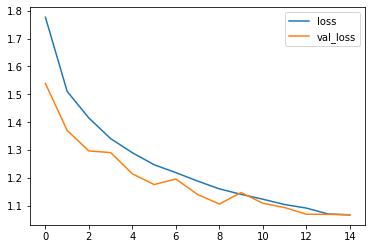

In [42]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
#SIN POOLING - nuevamente parece haber overfiting, pero menos
#CON POOLING - underfiting total. Max pooling no es la rta
#CON RELU

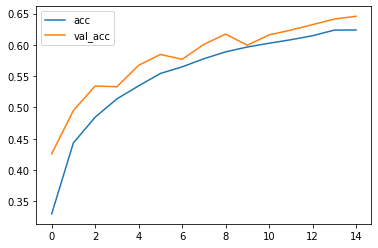

In [46]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
#SIN POOLING - el accuracy del valset parece haber convergido pero el el del training no. Overfiting??
#CON POOLING - convergen a la misma mierda de accuracy :(

Confusion matrix, without normalization
[[681  42  74  18  18  10  10  17  82  48]
 [ 19 763   4  11   0   7  18   2  21 155]
 [ 73  12 505  81  71 110  85  37  14  12]
 [ 21  10  51 407  59 268 102  40  15  27]
 [ 28   2  71  80 513  49 122 111  11  13]
 [  7   7  51 171  36 620  28  55   7  18]
 [  4  10  46  81  36  41 765   6   7   4]
 [ 12   5  22  57  58  87  14 690   8  47]
 [ 94  70   9  26  14   6   7   4 715  55]
 [ 20  85  12  18   3   3  19  16  26 798]]


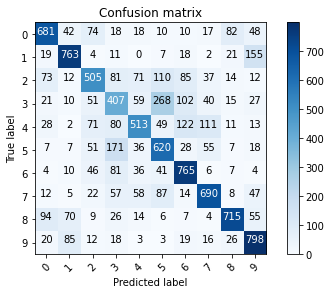

In [45]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

#SIN POOLING - Bastante mal, la CNN se confunde consistentemente cosas que nada que ver. (Aunque bastante mejor que cuando no tenia pooling)
#CON POOLING - Mejor pero aun asi bastante malo